# Preços de casas - Regressão Linear desafio Kaaggle


In [1]:
#importando o pandas
import pandas as pd

In [2]:
#importando o df
base = pd.read_csv('train.csv')

In [3]:
#validando a base
base.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
#shape da base
base.shape

(1460, 81)

In [5]:
#valores vazios
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [6]:
# eliminação de colunas com mais de 10% de dados vazios
eliminar = base.columns[base.isnull().sum()/base.shape[0] > 0.1]

In [7]:
#elkiminando as colunas
base = base.drop(eliminar, axis=1)

## Tratamento dos dados

In [8]:
#Selecionando apenas as colunas númericas
base2 = base.select_dtypes(include='number')

In [9]:
#verificação de dados nulos
base2.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
Id              0
dtype: int64

In [10]:
#subsituindo os valores nulos por -1
base2 = base2.fillna(-1)

## Iniciando o modelo

In [11]:
#selecionando x e y
X = base2.drop(['SalePrice'], axis=1)
y = base2.SalePrice

In [12]:
# importando o train_test_split
from sklearn.model_selection import train_test_split

In [13]:
#separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [15]:
# Criando a regressão e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [16]:
# Fazendo a previsão com os dados de teste
y_rl = reg_rl.predict(X_test)

In [17]:
# Importando a arvore de regresssão
from sklearn import tree

In [18]:
# Criando o regressor e fazendo o fit com os dados de treino 
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [19]:
# Fazendo a previsão 
y_ar = reg_ar.predict(X_test)

In [20]:
#Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [21]:
#Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [22]:
#fazendo a previsão
y_knn = reg_knn.predict(X_test)

In [23]:
#importando erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [24]:
# erro quadratico medio 
from sklearn.metrics import mean_squared_error

In [25]:
#avalindo o erro da regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23763.187393064778
1533982883.4448779


In [26]:
# do arvore
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27580.78838174274
2530245114.701245


In [27]:
# e do knn 
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

33273.08298755187
2733937586.841286


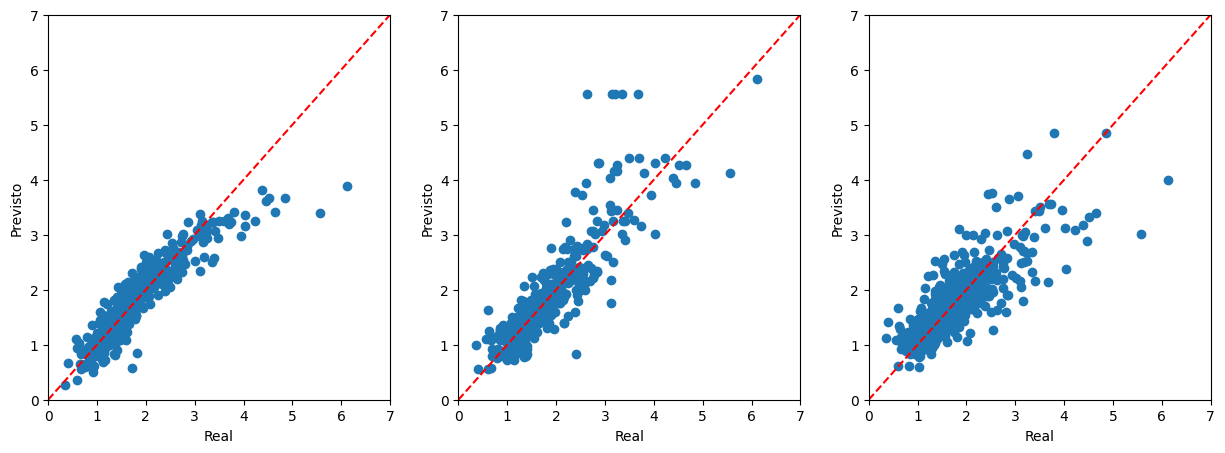

In [28]:
# criando o grafico para comparação
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0,7),ylim=(0,7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsto')
ax[1].set(xlim=(0,7),ylim=(0,7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsto')
ax[2].set(xlim=(0,7),ylim=(0,7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsto')

plt.show()

    vamos utilizar a regressão linear por ter sido o algoritmo com menor erro quadrático médio

## Fazendo a previsão para a base de teste

In [29]:
# importando o df
teste = pd.read_csv('test.csv')

In [30]:
# Eliminando as mesmas colunas da base de treino
teste =teste.drop(eliminar, axis=1)

In [31]:
colunas2 = teste.columns[teste.dtypes != 'object']

In [32]:
# Mantendo apenas as colunas númericas 
teste = teste.loc[:, colunas2]

In [33]:
#validando base 
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [34]:
# Valores vazios 
teste.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

In [35]:
# Vazios por -1
teste = teste.fillna(-1)

In [36]:
# Vamos usar a regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [37]:
# Adição coluna de previsão
teste['SalePrice'] = y_pred

In [38]:
# extração do id e saleprice
resultado = teste[['Id', 'SalePrice']]

In [39]:
#salvando o arquivo
resultado.to_csv('resultado.csv', index=False)